In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load Dataset
data = pd.read_csv('Wholesale customers data.csv')

In [22]:
# View the first few rows
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [6]:
# 2. Select Features for Clustering
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

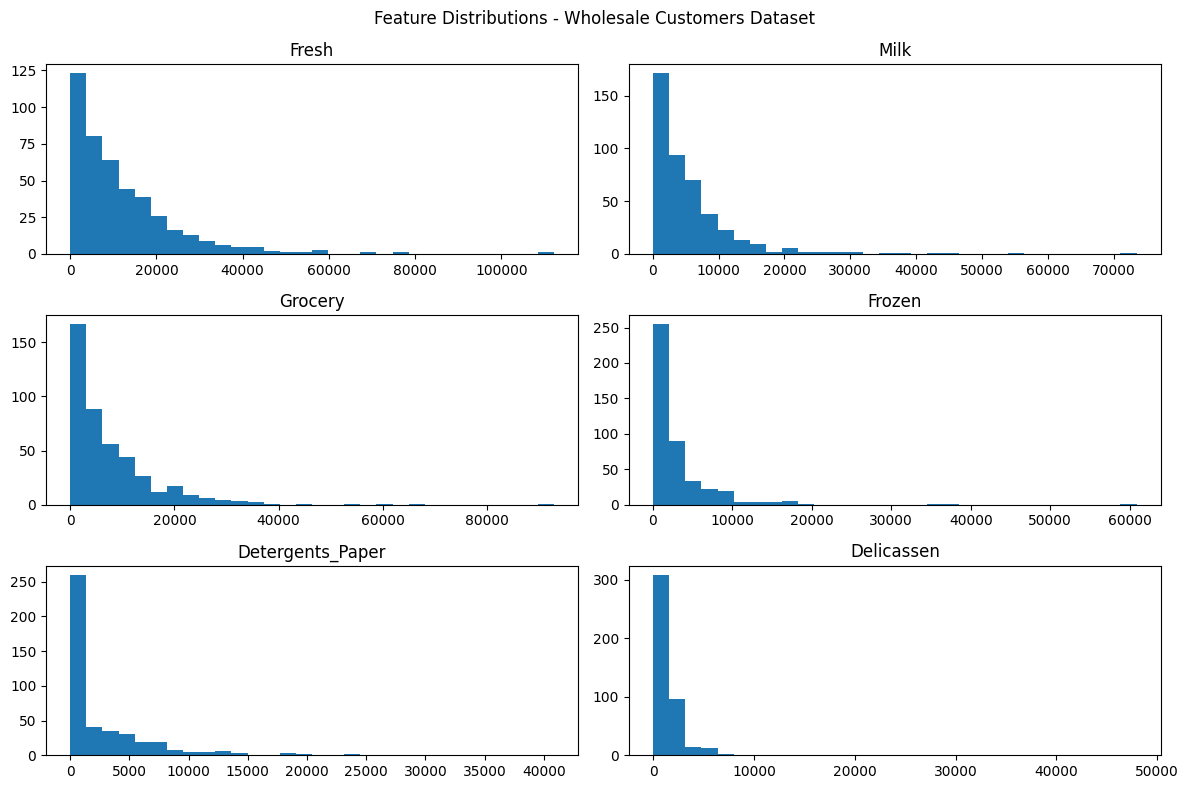

In [23]:
# Plot distributions
data[features].hist(bins=30, figsize=(12, 8), grid=False)
plt.suptitle('Feature Distributions - Wholesale Customers Dataset')
plt.tight_layout()
plt.savefig('wholesale_customers_feature_distributions.png')
plt.show()

In [7]:
# 3. Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Fit KMeans with a chosen number of clusters (we'll start with K=3 for now)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels

# Preview the result
print(data[['Cluster'] + features].head())

   Cluster  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        0  12669  9656     7561     214              2674        1338
1        0   7057  9810     9568    1762              3293        1776
2        0   6353  8808     7684    2405              3516        7844
3        0  13265  1196     4221    6404               507        1788
4        1  22615  5410     7198    3915              1777        5185


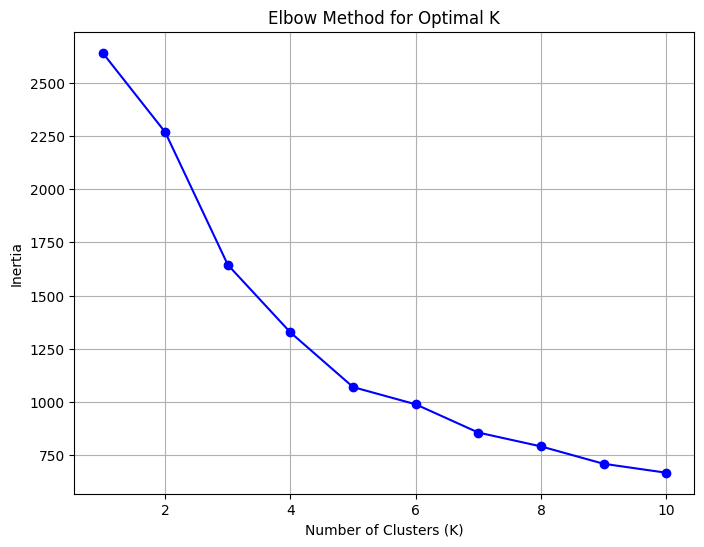

In [26]:
# 4. Elbow Method to Determine Optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig('elbow_method_wholesale.png')
plt.show()

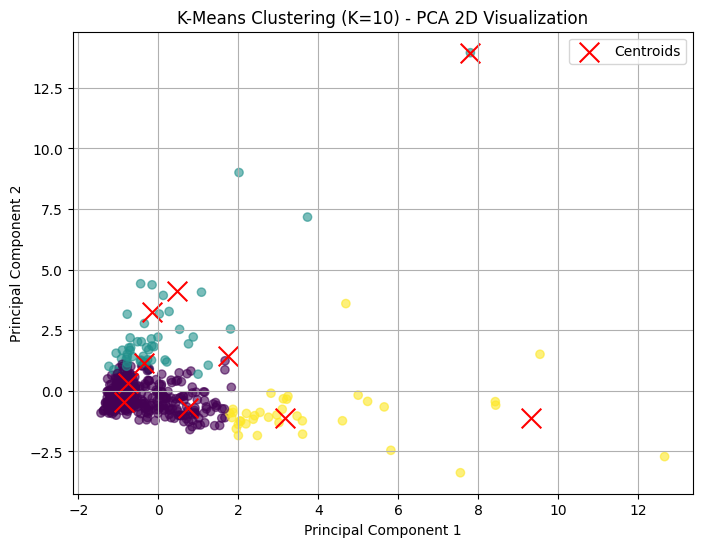

In [28]:
# PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)

# Optional: Plot centroids in PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title(f'K-Means Clustering (K={k}) - PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_clusters_wholesale.png')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

# Use the standardized data and cluster labels
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f'Silhouette Score for K={k}: {silhouette_avg:.3f}')

Silhouette Score for K=10: 0.458
